In [1]:
from drivers.loaders.imdb import IMDB

from drivers.tokenizers.word_piece_vocab import WordPieceVocab
from drivers.tokenizers.word_level_vocab import WordLevelVocab
from drivers.tokenizers.unigram_vocab import UnigramVocab
from drivers.tokenizers.bpe_vocab import BPEVocab

VOCAB_SIZE = 1000
UNK_TOKEN = "[UNK]"

db = IMDB("data")

vocab = WordLevelVocab(db.get_train()["text"].values, UNK_TOKEN, VOCAB_SIZE)

In [2]:
import os

PATH_VOCABS = "vocabs/"

file_name_vocab = PATH_VOCABS + vocab.name + "_" + db.name + ".json"

print(file_name_vocab)

if os.path.isfile(file_name_vocab) == False:
    vocab.train()
    print("TRAINED:", db.name)
    
    vocab.save(file_name_vocab)
    print("SAVED:", db.name)
else:
    vocab.load(file_name_vocab)
    print("LOADED:", db.name)

vocabs/word_level_IMDB.json
LOADED: IMDB


In [3]:
from drivers.rl.util_tensorboard import TensorboardLoggerSimple, DummyLogger
from drivers.rl.vocab_search import VocabEnv, VocabSearch

X_train = db.get_train()["text"]
y_train = db.get_train()["label"]
X_test = db.get_train()["text"]
y_test = db.get_test()["label"]
n_classes = len(y_train.unique())

In [4]:
from drivers.models.simple import Simple

simple_name = "Simple_" + db.name + "_" + vocab.name

model = Simple(input_length=128, output_size=db.get_labels(),
                repeate=1,
                name=simple_name)

In [5]:
vocab_search = VocabSearch(X_train, y_train, {v: k for k, v in vocab.tokenizer.get_vocab().items()}, n_classes, model=model, input_length=128, logger=DummyLogger(log_dir=""), min_vocab_size=2) #logger=TensorboardLoggerSimple(log_dir="tb_logs")

run  0   total_reward : 0
Creating model with Vocab size  3
{'[UNK]': 0, '[SEP]': 1, '[CLS]': 2}
-------------------------


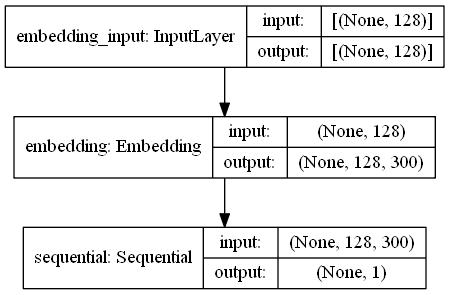

In [6]:
from tensorflow.python.keras.utils.vis_utils import plot_model

env = VocabEnv(X_train, y_train, None, None, possible_words=vocab.tokenizer.get_vocab(), input_length=model.input_length, n_classes=n_classes, model=model)

env.reset()

model_built = env._build_model()

plot_model(model_built, show_shapes=True, show_layer_names=True)

In [ ]:

#model._create_model(vocab_size=10)
#model.model.fit(env._preprocess_input(X_train), y_train)

In [7]:
vocab_search.search(n_envs=1, single_thread=True)

run  0   total_reward : 0
run  1   total_reward : -1
run  2   total_reward : -1
run  3   total_reward : -1
run  4   total_reward : -1
run  5   total_reward : -1
run  6   total_reward : -1
run  7   total_reward : -1
run  8   total_reward : -1
run  9   total_reward : -1
run  10   total_reward : -1
run  11   total_reward : -1
run  12   total_reward : -1
run  13   total_reward : -1
run  14   total_reward : -1
run  15   total_reward : -1
run  16   total_reward : -1
run  17   total_reward : -1
run  18   total_reward : -1
run  19   total_reward : -1
run  20   total_reward : -1
run  21   total_reward : -1
run  22   total_reward : -1
run  23   total_reward : -1
run  24   total_reward : -1
run  25   total_reward : -1
run  26   total_reward : -1
run  27   total_reward : -1
run  28   total_reward : -1
run  29   total_reward : -1
run  30   total_reward : -1
run  31   total_reward : -1
run  32   total_reward : -1
run  33   total_reward : -1
run  34   total_reward : -1
run  35   total_reward : -1
run

KeyboardInterrupt: 